# Movie Review Binary Classification


IMDB dataset
- sentimental text reviews of the movie
- labeled opinions(positive 1, negative 0)
- Binary labeled -> supervised learning

1. Load Dataset

In [1]:
import keras
from keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

# num_words=top_words 리뷰에 등장하는 빈도수 높은 단어 

17473536/17464789 [==============================] - 0s 0us/step


2. Data preprocessing

In [2]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i ,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

3. model building

In [3]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

4. Validating

In [29]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))
history_dict = history.history
history_dict.keys()              
accuracy_first=history.history['accuracy']
val_of_accuracy_first=['val_of_accuracy']

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 2.4018e-09 - accuracy: 1.0000 - val_loss: 2.2848 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 2.3713e-09 - accuracy: 1.0000 - val_loss: 2.2870 - val_accuracy: 0.8642
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 2.3419e-09 - accuracy: 1.0000 - val_loss: 2.2888 - val_accuracy: 0.8644
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 2.3146e-09 - accuracy: 1.0000 - val_loss: 2.2910 - val_accuracy: 0.8641
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 2.2895e-09 - accuracy: 1.0000 - val_loss: 2.2928 - val_accuracy: 0.8643
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 2.2501e-09 - accuracy: 1.0000 - val_loss: 2.2956 - val_accuracy: 0.8641
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 2.2375e-09 - accuracy: 1.0000 - val_loss: 2.2967 - val_ac

Visualization

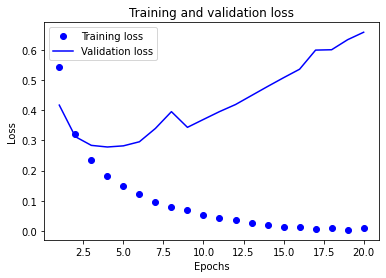

In [13]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_of_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_of_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

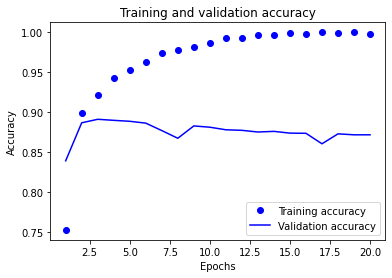

In [14]:
plt.clf() 
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_of_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Additional experiments

Reducing 1 hidden layer
=> Use single hidden layer 

In [26]:
model_second=models.Sequential()
model_second.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model_second.add(layers.Dense(1,activation='sigmoid'))
model_second.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_second=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))
history_dict_second = history.history 


Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 8.1612e-08 - accuracy: 1.0000 - val_loss: 1.8796 - val_accuracy: 0.8637
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 5.9692e-08 - accuracy: 1.0000 - val_loss: 1.9166 - val_accuracy: 0.8641
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 4.5879e-08 - accuracy: 1.0000 - val_loss: 1.9413 - val_accuracy: 0.8634
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 3.5733e-08 - accuracy: 1.0000 - val_loss: 1.9686 - val_accuracy: 0.8639
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 2.9132e-08 - accuracy: 1.0000 - val_loss: 1.9911 - val_accuracy: 0.8640
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 2.3530e-08 - accuracy: 1.0000 - val_loss: 2.0125 - val_accuracy: 0.8636
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 1.9734e-08 - accuracy: 1.0000 - val_loss: 2.0314 - val_ac

Adding multiple hidden layer

In [27]:
model_third=models.Sequential()
model_third.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model_third.add(layers.Dense(16,activation='relu'))
model_third.add(layers.Dense(16,activation='relu'))
model_third.add(layers.Dense(16,activation='relu'))
model_third.add(layers.Dense(16,activation='relu'))
model_third.add(layers.Dense(16,activation='relu'))
model_third.add(layers.Dense(16,activation='relu'))
model_third.add(layers.Dense(1,activation='sigmoid'))
model_third.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_third=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))
history_dict_third= history.history


Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 5.4268e-09 - accuracy: 1.0000 - val_loss: 2.1752 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 5.1983e-09 - accuracy: 1.0000 - val_loss: 2.1798 - val_accuracy: 0.8636
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 4.9252e-09 - accuracy: 1.0000 - val_loss: 2.1853 - val_accuracy: 0.8636
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 4.7072e-09 - accuracy: 1.0000 - val_loss: 2.1913 - val_accuracy: 0.8633
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 4.5152e-09 - accuracy: 1.0000 - val_loss: 2.1965 - val_accuracy: 0.8633
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 4.3442e-09 - accuracy: 1.0000 - val_loss: 2.2011 - val_accuracy: 0.8636
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 4.1689e-09 - accuracy: 1.0000 - val_loss: 2.2064 - val_ac

Reducing epoch size

In [28]:
model_fourth=models.Sequential()
model_fourth.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model_fourth.add(layers.Dense(16,activation='relu'))
model_fourth.add(layers.Dense(16,activation='relu'))
model_fourth.add(layers.Dense(16,activation='relu'))
model_fourth.add(layers.Dense(16,activation='relu'))
model_fourth.add(layers.Dense(16,activation='relu'))
model_fourth.add(layers.Dense(16,activation='relu'))
model_fourth.add(layers.Dense(1,activation='sigmoid'))
model_fourth.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fourth=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=10,
                 batch_size=512,
                 validation_data=(x_val,y_val))
history_dict_fourth= history.history

Epoch 1/10
30/30 [==============================] - 1s 50ms/step - loss: 2.8241e-09 - accuracy: 1.0000 - val_loss: 2.2584 - val_accuracy: 0.8635
Epoch 2/10
30/30 [==============================] - 1s 37ms/step - loss: 2.7589e-09 - accuracy: 1.0000 - val_loss: 2.2613 - val_accuracy: 0.8635
Epoch 3/10
30/30 [==============================] - 1s 38ms/step - loss: 2.7202e-09 - accuracy: 1.0000 - val_loss: 2.2648 - val_accuracy: 0.8635
Epoch 4/10
30/30 [==============================] - 1s 38ms/step - loss: 2.6829e-09 - accuracy: 1.0000 - val_loss: 2.2670 - val_accuracy: 0.8635
Epoch 5/10
30/30 [==============================] - 1s 38ms/step - loss: 2.6274e-09 - accuracy: 1.0000 - val_loss: 2.2706 - val_accuracy: 0.8640
Epoch 6/10
30/30 [==============================] - 1s 37ms/step - loss: 2.5747e-09 - accuracy: 1.0000 - val_loss: 2.2732 - val_accuracy: 0.8641
Epoch 7/10
30/30 [==============================] - 1s 38ms/step - loss: 2.5392e-09 - accuracy: 1.0000 - val_loss: 2.2751 - val_ac